<a href="https://colab.research.google.com/github/vijayshankarrealdeal/intro_to_pytorch-Gans/blob/main/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import torch
print(torch.__version__)

1.9.0+cu102


In [132]:
torch.cuda.is_available()

True

In [133]:
x = torch.Tensor(10).random_(0,10)
x

tensor([6., 8., 6., 2., 0., 8., 0., 1., 2., 9.])

In [134]:
x.to('cuda')

tensor([6., 8., 6., 2., 0., 8., 0., 1., 2., 9.], device='cuda:0')

In [135]:
x.to("cpu")

tensor([6., 8., 6., 2., 0., 8., 0., 1., 2., 9.])

In [136]:
vector = torch.tensor([1,2,3,4,5])
vector

tensor([1, 2, 3, 4, 5])

In [137]:
matrix_2d = torch.tensor([[1,2,3,4],[5,6,7,8]]) 
matrix_2d

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

In [138]:
matrix_3d = torch.tensor([[[1,2,3],[4,5,6],[5,6,7]]])
matrix_3d

tensor([[[1, 2, 3],
         [4, 5, 6],
         [5, 6, 7]]])

In [139]:
vector.shape

torch.Size([5])

In [140]:
matrix_2d.shape

torch.Size([2, 4])

In [141]:
matrix_3d.shape

torch.Size([1, 3, 3])

In [142]:
gpu = torch.tensor([2,3,4,5]).cuda()
gpu

tensor([2, 3, 4, 5], device='cuda:0')

In [143]:
example = torch.rand(3,3).cuda()
example

tensor([[0.0692, 0.4238, 0.8879],
        [0.2135, 0.8061, 0.6893],
        [0.0754, 0.2431, 0.6690]], device='cuda:0')

In [144]:
example_1 = torch.randint(low=0, high=2, 
                          size=(9,9)).type(torch.FloatTensor)
example_1

tensor([[1., 0., 0., 1., 1., 1., 1., 0., 1.],
        [1., 0., 0., 1., 1., 1., 0., 0., 1.],
        [1., 1., 0., 0., 1., 1., 0., 1., 0.],
        [1., 0., 1., 0., 1., 1., 1., 1., 1.],
        [1., 1., 1., 0., 1., 1., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0., 1., 1.],
        [1., 1., 1., 0., 1., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 1., 0., 1., 1., 1., 1.]])

In [145]:
import matplotlib.pyplot as plt


In [146]:
x = torch.tensor([-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0],requires_grad=True)
x

tensor([-6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.],
       requires_grad=True)

In [147]:
a = torch.tensor([1.0,2.0,3.0,4.0,5.0,6.0,7.0],requires_grad=True)
ab = (a ** 2).sum()
ab.backward()
ab

tensor(140., grad_fn=<SumBackward0>)

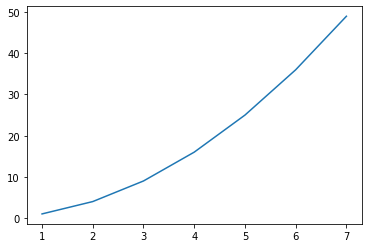

In [152]:
plt.plot(a.detach().numpy(),a.detach().numpy()**2)

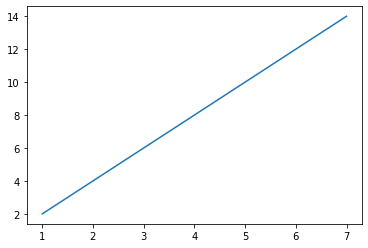

In [150]:
plt.plot(a.detach().numpy(),a.grad.data)

In [148]:
print(a.grad.data)

tensor([ 2.,  4.,  6.,  8., 10., 12., 14.])


In [153]:
import torch.nn as nn 

In [155]:
input_units = 10
hidden_units = 5
output_units = 1

In [156]:
model = nn.Sequential(
        
        nn.Linear(input_units,hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units,output_units),
        nn.Sigmoid()
)
loss_fn = nn.MSELoss()

In [157]:
print(model)

Sequential(
  (0): Linear(in_features=10, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
  (3): Sigmoid()
)


In [163]:
for i in model.parameters():
  print(i.shape)

torch.Size([5, 10])
torch.Size([5])
torch.Size([1, 5])
torch.Size([1])


In [159]:
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

In [160]:
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [176]:
x = torch.randn(20,10)
y = torch.randint(0,2, (20,1)).type(torch.FloatTensor)

In [189]:
num_iter = 20000
losses = []
for i in range(num_iter):
  y_pred = model(x)
  loss_n = loss_fn(y_pred,y)
  losses.append(loss_n.item())
  if i%20 == 0:
    print(loss_n.item())
  optimizer.zero_grad()
  loss_n.backward()
  optimizer.step()


0.23939499258995056
0.2392837107181549
0.23917309939861298
0.23906321823596954
0.23895399272441864
0.23884549736976624
0.23873767256736755
0.23863251507282257
0.23852844536304474
0.23842498660087585
0.2383222132921219
0.2382199764251709
0.23811841011047363
0.2380174845457077
0.23791714012622833
0.23781736195087433
0.23771825432777405
0.23761968314647675
0.23752319812774658
0.23743155598640442
0.23734048008918762
0.23724989593029022
0.2371598780155182
0.23707035183906555
0.2369813621044159
0.23689286410808563
0.23680491745471954
0.23671741783618927
0.23663046956062317
0.2365439385175705
0.2364579737186432
0.2363724708557129
0.23628747463226318
0.2362029105424881
0.2361188381910324
0.23603525757789612
0.23595216870307922
0.23586948215961456
0.2357873022556305
0.23570552468299866
0.23562419414520264
0.23554334044456482
0.23546293377876282
0.23538288474082947
0.2353033572435379
0.2352241724729538
0.2351454496383667
0.23506715893745422
0.2349892556667328
0.23491176962852478
0.23483470082283

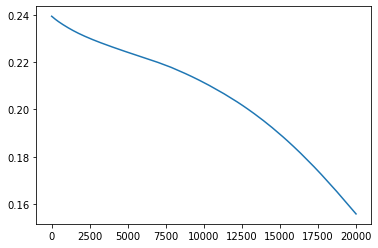

In [190]:
plt.plot(range(num_iter),losses)